## ML Lab Internal Exam - SET 1
## Name: Ramesh
## ID: B200571
## Class: CSE_C1

## Dataset Description
The classification task of this database is to determine where patients in a postoperative recovery area (after a operation) should be sent to next. Because hypothermia is a significant concern after surgery (Woolery, L. et. al. 1991), the attributes correspond roughly to body temperature measurements. 


<b>Attribute Information:</b><br>

1. L-CORE (patient's internal temperature in C): <br>
high (> 37), mid (>= 36 and <= 37), low (< 36) <br>
2. L-SURF (patient's surface temperature in C): <br>
high (> 36.5), mid (>= 36.5 and <= 35), low (< 35) <br>
3. L-O2 (oxygen saturation in %): <br>
excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80) <br>
4. L-BP (last measurement of blood pressure): <br>
high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70) <br> 
5. SURF-STBL (stability of patient's surface temperature): <br>
stable, mod-stable, unstable <br>
6. CORE-STBL (stability of patient's core temperature) <br>
stable, mod-stable, unstable <br>
7. BP-STBL (stability of patient's blood pressure) <br>
stable, mod-stable, unstable <br>
8. COMFORT (patient's perceived comfort at discharge, measured as an integer between 0 and 20) <br>
9. decision ADM-DECS (discharge decision): <br>
I  (patient sent to Intensive Care Unit), <br>
S (patient prepared to go home), <br>
A (patient sent to general hospital floor)

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,accuracy_score,f1_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Import Dataset - set1_data.csv 
df=pd.read_csv('set1_data.csv')
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10.0,A
86,mid,mid,excellent,mid,unstable,stable,stable,15.0,S
87,mid,mid,NaN,mid,unstable,stable,stable,15.0,A
88,mid,mid,excellent,mid,unstable,stable,stable,10.0,A


In [21]:
# Print top 5 and random 5 values - 2 Marks
print(df.head())

x=df.sample(n=5)
print("random \n",x)

  L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL  COMFORT  \
0    mid    low  excellent   mid    stable    stable      stable     15.0   
1    mid   high  excellent  high    stable    stable      stable     10.0   
2   high    low  excellent  high    stable    stable  mod-stable     10.0   
3    mid    low       good  high    stable  unstable  mod-stable     15.0   
4    mid    mid  excellent  high    stable    stable      stable     10.0   

  ADM-DECS  
0        A  
1        S  
2        A  
3        A  
4        A  
random 
    L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL  COMFORT  \
47    mid    mid  excellent   mid  unstable    stable      stable     10.0   
62    mid    mid       good   mid    stable    stable    unstable     10.0   
2    high    low  excellent  high    stable    stable  mod-stable     10.0   
68    mid    mid  excellent  high    stable    stable      stable     10.0   
18    mid   high       good   mid  unstable    stable    uns

In [11]:
#Print column names - 1 Marks
print(df.columns)

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'ADM-DECS'],
      dtype='object')


In [12]:
#Check the data type of each column - 1 Marks
print(df.dtypes)

L-CORE        object
L-SURF        object
L-O2          object
L-BP          object
SURF-STBL     object
CORE-STBL     object
BP-STBL       object
COMFORT      float64
ADM-DECS      object
dtype: object


In [13]:
#Print number of rows and columns 1 Mark
print("Rows : ",df.shape[0])
print("Columns : ",df.shape[1])

Rows :  90
Columns :  9


In [14]:
#Print summary statistics of all variables - 1 Mark
df.describe()

,COMFORT
count,87.000000
mean,10.942529
std,2.304477
min,5.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,15.000000


In [ ]:
#Print the number of missing values in each column - 1 Marks
print(df.isnull().sum())

L-CORE       1
L-SURF       0
L-O2         1
L-BP         0
SURF-STBL    1
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64


In [35]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Mark
#Print the number of missing values in each column after imputation

df['L-CORE']=df['L-CORE'].fillna(df['L-CORE'].mode()[0])
df['SURF-STBL']=df['SURF-STBL'].fillna(df['SURF-STBL'].mode()[0])
df['L-O2']=df['L-O2'].fillna(df['L-O2'].mode()[0])
df['COMFORT']=df['COMFORT'].fillna(df['COMFORT'].mean())
df.isnull().sum()

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
ADM-DECS     0
dtype: int64

In [36]:
#Print count of patients in each category - 1 Marks
df['ADM-DECS'].value_counts()

ADM-DECS
A    64
S    24
I     2
Name: count, dtype: int64

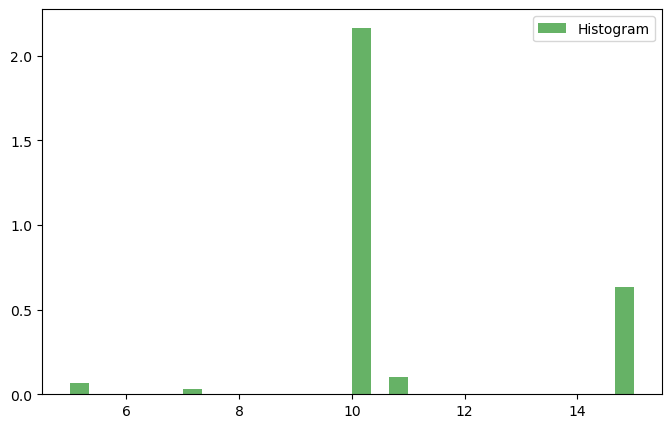

In [37]:
#Plot histogram of values of patient's perceived comfort at discharge - 1 Marks


column="COMFORT"


plt.figure(figsize=(8, 5))
plt.hist(df[column], bins=30, density=True, alpha=0.6, color="green", label="Histogram")
plt.legend()
plt.show()


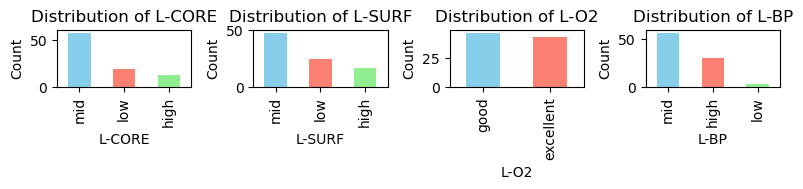

In [38]:
# Plot barchart of L-CORE, L-SURF,L-O2 and L-BP using 4X4 subplots - 3 Marks
#num_bins = 10
columns = ["L-CORE","L-SURF","L-O2", "L-BP"]

plt.figure(figsize=(8, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    df[col].value_counts().plot(kind="bar", color=['skyblue', 'salmon', 'lightgreen', 'yellow'])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

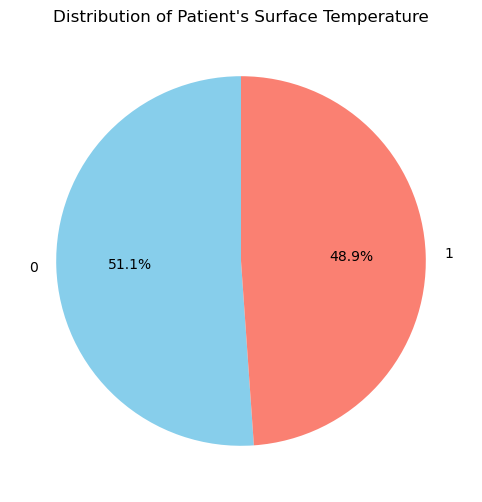

In [64]:
# Plot pie chart of patient's surface temperature in C - 2 Mark
plt.figure(figsize=(8, 6))
df['SURF-STBL'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribution of Patient's Surface Temperature")
plt.ylabel('')
plt.show()

In [40]:
#Prepare X - input matrix and y - label vector - 1 Mark
#col=["L-CORE","L-SURF","L-O2", "L-BP","SURF-STBL", "CORE-STBL","BP-STBL","COMFORT"]
#X=df[[col]]
#Y=df['ADM-DECS']
X=df.drop(columns='ADM-DECS',axis=1)
Y=df["ADM-DECS"]
print(X)
print(Y)

   L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL  COMFORT
0     mid    low  excellent   mid    stable    stable      stable     15.0
1     mid   high  excellent  high    stable    stable      stable     10.0
2    high    low  excellent  high    stable    stable  mod-stable     10.0
3     mid    low       good  high    stable  unstable  mod-stable     15.0
4     mid    mid  excellent  high    stable    stable      stable     10.0
..    ...    ...        ...   ...       ...       ...         ...      ...
85    mid    mid  excellent   mid  unstable    stable      stable     10.0
86    mid    mid  excellent   mid  unstable    stable      stable     15.0
87    mid    mid       good   mid  unstable    stable      stable     15.0
88    mid    mid  excellent   mid  unstable    stable      stable     10.0
89    mid    mid       good   mid  unstable    stable      stable     15.0

[90 rows x 8 columns]
0     A
1     S
2     A
3     A
4     A
     ..
85    A
86    S
87    A
88   

In [48]:
#Apply label encoder for categorical columns - 2 Marks
from sklearn.preprocessing import LabelEncoder

encode =LabelEncoder()
col=["L-CORE","L-SURF","L-O2", "L-BP","SURF-STBL", "CORE-STBL","BP-STBL","ADM-DECS"]
for i in col:
    df[i]=encode.fit_transform(df[i])

df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,2,1,0,2,0,1,1,15.0,0
1,2,0,0,0,0,1,1,10.0,2
2,0,1,0,0,0,1,0,10.0,0
3,2,1,1,0,0,2,0,15.0,0
4,2,2,0,0,0,1,1,10.0,0


In [49]:
X=df.drop(columns='ADM-DECS',axis=1)
Y=df["ADM-DECS"]

In [50]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 4)
print(x_train)


    L-CORE  L-SURF  L-O2  L-BP  SURF-STBL  CORE-STBL  BP-STBL    COMFORT
16       1       0     1     0          1          1        0  15.000000
19       2       2     1     2          0          1        1  10.000000
87       2       2     1     2          1          1        1  15.000000
35       2       2     1     2          0          1        1  10.000000
18       2       0     1     2          1          1        2  15.000000
..     ...     ...   ...   ...        ...        ...      ...        ...
72       2       2     0     2          0          1        0  10.000000
1        2       0     0     0          0          1        1  10.000000
69       2       2     0     1          0          1        1  10.000000
55       2       2     1     2          1          1        1  15.000000
46       1       2     1     0          1          1        1  10.942529

[63 rows x 8 columns]


In [51]:
#Print train and test data size
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(63, 8)
(63,)
(27, 8)
(27,)


In [ ]:
# Fit the Naive Bayes classifier on training data - 3 Marks
model = BernoulliNB()
model.fit(x_train, y_train)


Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual labels:  [2 0 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2]
Accuracy:  0.5925925925925926
Confusion Matrix: 
 [[16  0]
 [11  0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        16
           2       0.00      0.00      0.00        11

    accuracy                           0.59        27
   macro avg       0.30      0.50      0.37        27
weighted avg       0.35      0.59      0.44        27



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Make prediction on test data - 1 Marks

y_pred = model.predict(x_test)
print("Predicted labels: ", y_pred)

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [62]:
# Check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))         
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred,average='micro'))
print("Recall: ", recall_score(y_test, y_pred,average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='micro'))


Confusion Matrix: 
 [[16  0]
 [11  0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        16
           2       0.00      0.00      0.00        11

    accuracy                           0.59        27
   macro avg       0.30      0.50      0.37        27
weighted avg       0.35      0.59      0.44        27

Accuracy:  0.5925925925925926
Precision:  0.5925925925925926
Recall:  0.5925925925925926
F1 Score:  0.5925925925925926


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Apply prediction on any one sample input and print the probability estimates for each class - 1 marks
sample_input = x_test.iloc[0].values.reshape(1, -1)
print("Sample Input: ", sample_input)
probability_estimates = model.predict_proba(sample_input)
print("Probability Estimates: ", probability_estimates)


Sample Input:  [[ 2.  1.  1.  0.  1.  2.  1. 15.]]
Probability Estimates:  [[0.85369252 0.0332021  0.11310538]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
